In [ ]:
%cd "drive/MyDrive/NLP/"

/content/drive/MyDrive/NLP


In [ ]:
!ls

AriaBERT_Workshop  digimag.zip	      HW2  HW4	SentimentAnalysisWorkshop.ipynb  Workshop_VQA
digimag		   HF_WorkShop.ipynb  HW3  HW5	Untitled


In [ ]:
!unzip 'digimag.zip'

Archive:  digimag.zip
   creating: digimag/
  inflating: digimag/dev.csv         
  inflating: digimag/train.csv       
  inflating: digimag/test.csv        


In [ ]:
!ls

AriaBERT_Workshop  digimag.zip	      HW2  HW4	SentimentAnalysisWorkshop.ipynb  Workshop_VQA
digimag		   HF_WorkShop.ipynb  HW3  HW5	Untitled


In [ ]:
import pandas as pd

In [ ]:
train_set = pd.read_csv('digimag/train.csv', delimiter="\t", encoding='utf-8')
dev_set = pd.read_csv('digimag/dev.csv', delimiter="\t", encoding='utf-8')
test_set = pd.read_csv('digimag/test.csv', delimiter="\t", encoding='utf-8')

In [ ]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6896 non-null   int64 
 1   content     6896 non-null   object
 2   label       6896 non-null   object
 3   label_id    6896 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 215.6+ KB
None


In [ ]:
train_set.head()

,Unnamed: 0,content,label,label_id
0,0,نمایش تبلیغ در لاک‌اسکرین تعدادی از گوشی‌های ه...,علم و تکنولوژی,3
1,1,شکست Justice League در باکس آفیس پس از بازخورد...,هنر و سینما,5
2,2,کلاسیک بینی؛ همه چیز در یک شب اتفاق افتاد فیلم...,هنر و سینما,5
3,3,اپل دوباره سراغ رنده رفته چراکه آپگرید کردن سط...,علم و تکنولوژی,3
4,4,بررسی جزء به جزء بهترین بخش Ori and the Blind ...,بازی ویدیویی,0


In [ ]:
!pip install hazm

In [ ]:
!pip install cleantext

In [ ]:
type(train_set)

pandas.core.frame.DataFrame

The Hazm library is a comprehensive tool for Persian (Farsi) Natural Language Processing (NLP). It can be used to remove redundant punctuation marks, convert Arabic characters into Farsi, and standardize the format of letters.  

The hazm.normalize() function can be used to remove redundant punctuation marks, convert Arabic characters into Farsi, and standardize the format of letters. The function takes a single argument, which is the text you want to normalize.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

groupby_label = train_set.groupby('label_id')['label_id'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_label.index)),
    y=groupby_label.tolist(),
    text=groupby_label.tolist(),
    textposition='auto'
))

fig.update_layout(
    title_text='Distribution of label within contents [DATA]',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

In [ ]:
train_set['label'].unique()

array(['علم و تکنولوژی', 'هنر و سینما', 'بازی ویدیویی', 'کتاب و ادبیات',
       'سلامت و زیبایی', 'عمومی', 'راهنمای خرید'], dtype=object)

In [ ]:
replacement_dict = {'راهنمای خرید': 'غیره', 'عمومی': 'غیره', 'کتاب و ادبیات': 'غیره'}
train_set['label'] = train_set['label'].replace(replacement_dict)
dev_set['label'] = dev_set['label'].replace(replacement_dict)
test_set['label'] = test_set['label'].replace(replacement_dict)

In [ ]:
train_set['label'].unique()

array(['علم و تکنولوژی', 'هنر و سینما', 'بازی ویدیویی', 'غیره',
       'سلامت و زیبایی'], dtype=object)

In [ ]:
mapping_dict = {'علم و تکنولوژی' : 0, 'بازی ویدیویی': 1, 'هنر و سینما': 2, 'سلامت و زیبایی': 3, 'غیره': 4}
def map_label_id(row):
    return mapping_dict[row['label']]

train_set['label_id'] = train_set.apply(map_label_id, axis=1)
dev_set['label_id'] = dev_set.apply(map_label_id, axis=1)
test_set['label_id'] = test_set.apply(map_label_id, axis=1)

In [ ]:
fig = go.Figure()

groupby_label = train_set.groupby('label_id')['label_id'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_label.index)),
    y=groupby_label.tolist(),
    text=groupby_label.tolist(),
    textposition='auto'
))

fig.update_layout(
    title_text='Distribution of label within contents [DATA]',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

In [ ]:
from cleantext import clean

In [ ]:
def cleaning(text):
    text = text.strip()

    # regular cleaning
    text = clean(text)
    return text


In [ ]:
train_set['content'] = train_set['content'].apply(cleaning)
dev_set['content'] = dev_set['content'].apply(cleaning)
test_set['content'] = test_set['content'].apply(cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from transformers import AutoModel, AutoTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F

import os

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [ ]:
# general config
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 3
EEVERY_EPOCH = 1000
LEARNING_RATE = 1e-4
CLIP = 0.0

MODEL_NAME_OR_PATH = 'ViraIntelligentDataMining/AriaBERT'
OUTPUT_PATH = '/content/bert-fa-base-uncased-text-classification-digimag/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [ ]:
labels = ['علم و تکنولوژی', 'بازی ویدیویی', 'هنر و سینما', 'سلامت و زیبایی', 'غیره']

In [ ]:
# create a key finder based on label 2 id and id to label

label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'علم و تکنولوژی': 0, 'بازی ویدیویی': 1, 'هنر و سینما': 2, 'سلامت و زیبایی': 3, 'غیره': 4}
id2label: {0: 'علم و تکنولوژی', 1: 'بازی ویدیویی', 2: 'هنر و سینما', 3: 'سلامت و زیبایی', 4: 'غیره'}


In [ ]:
# setup the tokenizer and configuration

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME_OR_PATH)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

In [ ]:
class DigiMagDataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for DigiMag. """

    def __init__(self, tokenizer, contents, labels=None, label_names=None, max_len=128):
        self.contents = contents
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.label_names = label_names

    def __len__(self):
        return len(self.contents)

    def __getitem__(self, item):
        content = str(self.contents[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            content,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')

        inputs = {
            'content': content,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        inputs['label'] = torch.tensor(label, dtype=torch.float64)

        return inputs


def create_data_loader(x, y, tokenizer, max_len, batch_size, label_list):
    dataset = DigiMagDataset(
        contents=x,
        labels=y,
        tokenizer=tokenizer,
        max_len=max_len)

    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [ ]:
train_data_loader = create_data_loader(train_set['content'].to_numpy(), train_set['label_id'].to_numpy(), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, labels)
dev_data_loader = create_data_loader(dev_set['content'].to_numpy(), dev_set['label_id'].to_numpy(), tokenizer, MAX_LEN, VALID_BATCH_SIZE, labels)
test_data_loader = create_data_loader(test_set['content'].to_numpy(), test_set['label_id'].to_numpy(), tokenizer, MAX_LEN, TEST_BATCH_SIZE, labels)

In [ ]:
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

dict_keys(['content', 'input_ids', 'attention_mask', 'token_type_ids', 'label'])


In [ ]:
class TextClassificationModel(nn.Module):

    def __init__(self, freeze_llm = False):
        super(TextClassificationModel, self).__init__()

        self.Aria = AutoModel.from_pretrained(MODEL_NAME_OR_PATH)
        if freeze_llm:
          for param in self.Aria.parameters():
            param.requires_grad = False

        self.classifier = nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output = self.Aria(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        logits = self.classifier(output.pooler_output)
        return logits

In [ ]:
pt_model = TextClassificationModel()
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

Some weights of RobertaModel were not initialized from the model checkpoint at ViraIntelligentDataMining/AriaBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pt_model <class '__main__.TextClassificationModel'>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from tqdm.notebook import tqdm
import numpy as np
num_classes = 5

In [ ]:
def simple_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def acc_and_f1(y_true, y_pred, average='weighted'):
    acc = simple_accuracy(y_true, y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):

            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            labels = dl['label']
            one_hot_labels = torch.tensor(labels, dtype=torch.int64)
            one_hot_labels = torch.nn.functional.one_hot(one_hot_labels, num_classes)
            one_hot_labels = torch.tensor(one_hot_labels, dtype=torch.float32)

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            one_hot_labels = one_hot_labels.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            loss = loss_fn(outputs, one_hot_labels)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(labels)

    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model,
             data_loader,
             loss_fn,
             optimizer,
             scheduler,
             step=0,
             print_every_step=100,
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None):

    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        labels = dl['label']
        one_hot_labels = torch.tensor(labels, dtype=torch.int64)
        one_hot_labels = torch.nn.functional.one_hot(one_hot_labels, num_classes)
        one_hot_labels = torch.tensor(one_hot_labels, dtype=torch.float32)

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        one_hot_labels = one_hot_labels.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        # convert output probabilities to predicted class
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        loss = loss_fn(outputs, one_hot_labels)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(labels)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

In [ ]:
import collections

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

optimizer = AdamW(pt_model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)



def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)

        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))

            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss

        return eval_loss_min

    return eval_cb



for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        scheduler=scheduler,
        step=step,
        print_every_step=EEVERY_EPOCH,
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=dev_data_loader)

    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

    eval_y, eval_loss = eval_op(
        model=pt_model,
        data_loader=dev_data_loader,
        loss_fn=loss_fn)

    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)

Epochs... :   0%|          | 0/3 [00:00<?, ?it/s]

Training... :   0%|          | 0/431 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

Training... :   0%|          | 0/431 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

Training... :   0%|          | 0/431 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 3/3...Step: 1000...Train Loss: 0.040092...Train Acc: 0.990...Valid Loss: 0.223145...Valid Acc: 0.937...
Validation loss decreased (inf --> 0.223145).  Saving model ...


Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

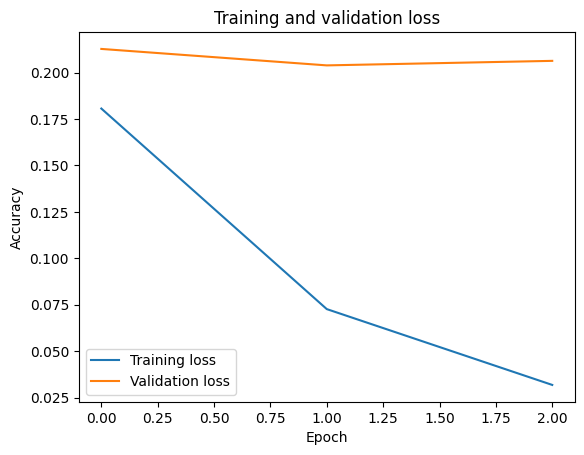

In [ ]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history dictionary
train_loss = history['train_loss']
val_loss = history['val_loss']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the training accuracy
ax.plot(train_loss, label='Training loss')

# Plot the validation accuracy
ax.plot(val_loss, label='Validation loss')

# Set the x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Training and validation loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()

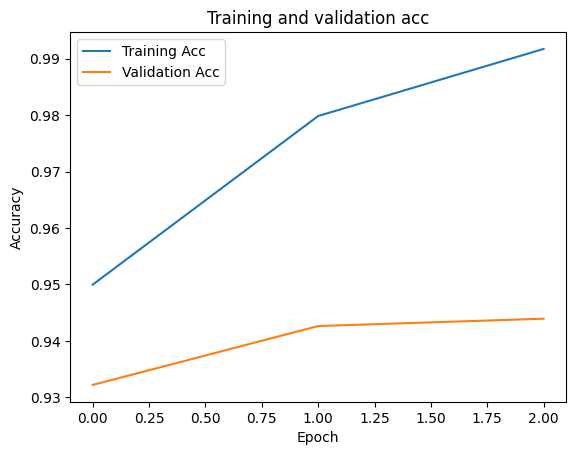

In [ ]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history dictionary
train_loss = history['train_acc']
val_loss = history['val_acc']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the training accuracy
ax.plot(train_loss, label='Training Acc')

# Plot the validation accuracy
ax.plot(val_loss, label='Validation Acc')

# Set the x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Training and validation acc')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
pt_model.eval()
y_true = []
y_pred = []
with torch.no_grad():
  for dl in tqdm(test_data_loader, total=len(test_data_loader), desc="Training... "):
          input_ids = dl['input_ids']
          attention_mask = dl['attention_mask']
          token_type_ids = dl['token_type_ids']
          labels = dl['label']

          # move tensors to GPU if CUDA is available
          input_ids = input_ids.to(device)
          attention_mask = attention_mask.to(device)
          token_type_ids = token_type_ids.to(device)

          # compute predicted outputs by passing inputs to the model
          outputs = pt_model(
              input_ids=input_ids,
              attention_mask=attention_mask,
              token_type_ids=token_type_ids)
          # convert output probabilities to predicted class
          _, preds = torch.max(outputs, dim=1)

          y_pred.extend(preds)
          y_true.extend(labels)

Training... :   0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
for i in range(len(y_pred)):
  y_pred[i] = int(y_pred[i].item())

In [ ]:
for i in range(len(y_true)):
  y_true[i] = int(y_true[i].item())

In [ ]:
Accuracy = sum(torch.tensor(y_pred) == torch.tensor(y_true)) / len(y_pred)

In [ ]:
Accuracy

tensor(0.9354)

In [ ]:
import sklearn.metrics as metrics

# Convert the predictions and the real labels to numpy arrays
predictions = np.array(y_pred)
real_labels = np.array(y_true)

# Calculate the number of categories
num_categories = 5

# Initialize the arrays for the precision, recall, and F1 score
precision = np.zeros(num_categories)
recall = np.zeros(num_categories)
f1_score = np.zeros(num_categories)

# Calculate the precision, recall, and F1 score for each category
for i in range(num_categories):
    precision[i], recall[i], f1_score[i], _ = metrics.precision_recall_fscore_support(
        real_labels, predictions, labels=[i,], average=None)

# Print the results
for i in range(num_categories):
    print(f'Category {i}:')
    print(f'  Precision: {precision[i]:.4f}')
    print(f'  Recall: {recall[i]:.4f}')
    print(f'  F1 score: {f1_score[i]:.4f}')

Category 0:
  Precision: 0.9571
  Recall: 0.9675
  F1 score: 0.9623
Category 1:
  Precision: 0.9694
  Recall: 0.9645
  F1 score: 0.9669
Category 2:
  Precision: 0.9244
  Recall: 0.9521
  F1 score: 0.9381
Category 3:
  Precision: 0.9245
  Recall: 0.9130
  F1 score: 0.9187
Category 4:
  Precision: 0.7333
  Recall: 0.6600
  F1 score: 0.6947


In [ ]:
mapping_dict

{'علم و تکنولوژی': 0,
 'بازی ویدیویی': 1,
 'هنر و سینما': 2,
 'سلامت و زیبایی': 3,
 'غیره': 4}

### Now time for freezed LLM

In [47]:
pt_model_freezed = TextClassificationModel(freeze_llm=True)
pt_model_freezed = pt_model_freezed.to(device)

print('pt_model', type(pt_model_freezed))

Some weights of RobertaModel were not initialized from the model checkpoint at ViraIntelligentDataMining/AriaBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pt_model <class '__main__.TextClassificationModel'>


In [48]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

optimizer = AdamW(pt_model_freezed.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)



def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)

        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))

            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss

        return eval_loss_min

    return eval_cb



for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model_freezed,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        scheduler=scheduler,
        step=step,
        print_every_step=EEVERY_EPOCH,
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=dev_data_loader)

    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

    eval_y, eval_loss = eval_op(
        model=pt_model_freezed,
        data_loader=dev_data_loader,
        loss_fn=loss_fn)

    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)

Epochs... :   0%|          | 0/3 [00:00<?, ?it/s]

Training... :   0%|          | 0/431 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

Training... :   0%|          | 0/431 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

Training... :   0%|          | 0/431 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 3/3...Step: 1000...Train Loss: 0.555550...Train Acc: 0.857...Valid Loss: 0.522047...Valid Acc: 0.855...
Validation loss decreased (inf --> 0.522047).  Saving model ...


Evaluation... :   0%|          | 0/48 [00:00<?, ?it/s]

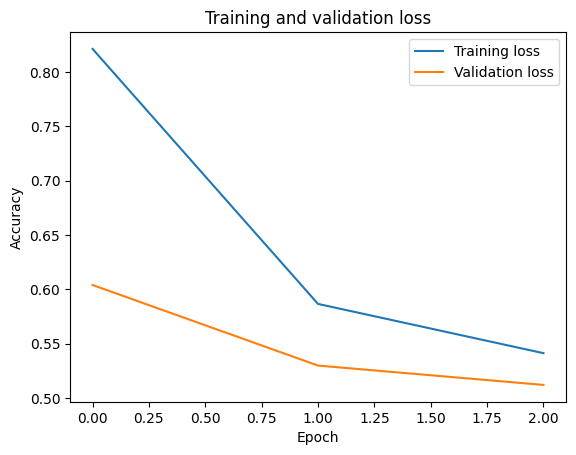

In [49]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history dictionary
train_loss = history['train_loss']
val_loss = history['val_loss']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the training accuracy
ax.plot(train_loss, label='Training loss')

# Plot the validation accuracy
ax.plot(val_loss, label='Validation loss')

# Set the x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Training and validation loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()

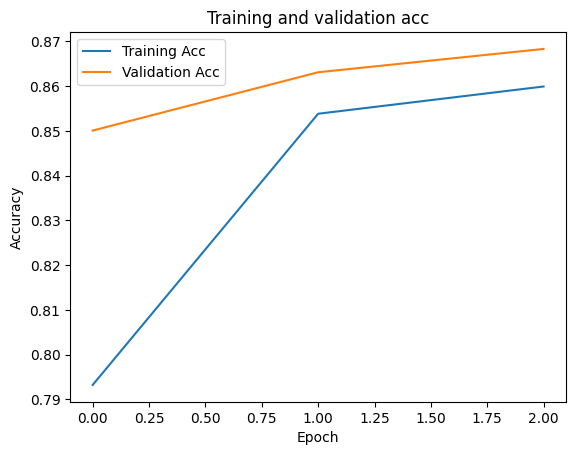

In [50]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history dictionary
train_loss = history['train_acc']
val_loss = history['val_acc']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the training accuracy
ax.plot(train_loss, label='Training Acc')

# Plot the validation accuracy
ax.plot(val_loss, label='Validation Acc')

# Set the x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Training and validation acc')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [51]:
pt_model_freezed.eval()
y_true = []
y_pred = []
with torch.no_grad():
  for dl in tqdm(test_data_loader, total=len(test_data_loader), desc="Training... "):
          input_ids = dl['input_ids']
          attention_mask = dl['attention_mask']
          token_type_ids = dl['token_type_ids']
          labels = dl['label']

          # move tensors to GPU if CUDA is available
          input_ids = input_ids.to(device)
          attention_mask = attention_mask.to(device)
          token_type_ids = token_type_ids.to(device)

          # compute predicted outputs by passing inputs to the model
          outputs = pt_model_freezed(
              input_ids=input_ids,
              attention_mask=attention_mask,
              token_type_ids=token_type_ids)
          # convert output probabilities to predicted class
          _, preds = torch.max(outputs, dim=1)

          y_pred.extend(preds)
          y_true.extend(labels)

Training... :   0%|          | 0/54 [00:00<?, ?it/s]

In [52]:
for i in range(len(y_true)):
  y_true[i] = int(y_true[i].item())
for i in range(len(y_pred)):
  y_pred[i] = int(y_pred[i].item())

In [53]:
Accuracy = sum(torch.tensor(y_pred) == torch.tensor(y_true)) / len(y_pred)
Accuracy

tensor(0.8592)

In [54]:
import sklearn.metrics as metrics

# Convert the predictions and the real labels to numpy arrays
predictions = np.array(y_pred)
real_labels = np.array(y_true)

# Calculate the number of categories
num_categories = 5

# Initialize the arrays for the precision, recall, and F1 score
precision = np.zeros(num_categories)
recall = np.zeros(num_categories)
f1_score = np.zeros(num_categories)

# Calculate the precision, recall, and F1 score for each category
for i in range(num_categories):
    precision[i], recall[i], f1_score[i], _ = metrics.precision_recall_fscore_support(
        real_labels, predictions, labels=[i,], average=None)

# Print the results
for i in range(num_categories):
    print(f'Category {i}:')
    print(f'  Precision: {precision[i]:.4f}')
    print(f'  Recall: {recall[i]:.4f}')
    print(f'  F1 score: {f1_score[i]:.4f}')

Category 0:
  Precision: 0.8758
  Recall: 0.9422
  F1 score: 0.9078
Category 1:
  Precision: 0.9605
  Recall: 0.8629
  F1 score: 0.9091
Category 2:
  Precision: 0.8462
  Recall: 0.9222
  F1 score: 0.8825
Category 3:
  Precision: 0.7592
  Recall: 0.9006
  F1 score: 0.8239
Category 4:
  Precision: 0.5000
  Recall: 0.0400
  F1 score: 0.0741


In [55]:
mapping_dict

{'علم و تکنولوژی': 0,
 'بازی ویدیویی': 1,
 'هنر و سینما': 2,
 'سلامت و زیبایی': 3,
 'غیره': 4}